In [1]:
# Move this cell UP and ModelCheckpoint will be logged
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

import cv2

Using TensorFlow backend.


In [2]:
from trains import Task
task = Task.init(project_name="examples", task_name='mnist_train_example')
logger = task.get_logger()

TRAINS Task: created new task id=983f324b12d14dd4aa94ee2a020f0051
2019-06-15 11:51:12,834 - trains.Task - WARNING - Failed auto-detecting task repository: expected one of: git environment, hg environment, hg, git
TRAINS results page: https://app.allegro.ai/projects/d641804f347140d5ba9add06d2a1e3b8/experiments/983f324b12d14dd4aa94ee2a020f0051/output/log


In [3]:
logger.set_default_upload_destination('s3://allegro-tutorials/ComputerVision')

In [4]:
task_params = {'num_scatter_samples': 60, 'sin_max_value': 20, 'sin_steps': 30}
task_params = task.connect(task_params)

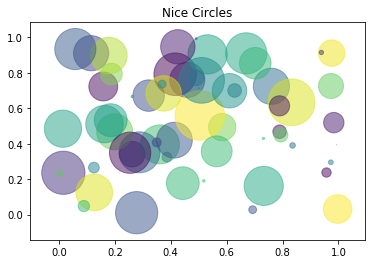

Text(0.5, 1.0, 'Sinus Dots')

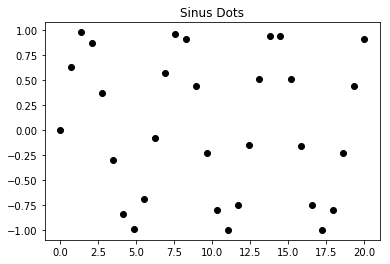

In [5]:
N = task_params['num_scatter_samples']
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Nice Circles')
plt.show()

x = np.linspace(0, task_params['sin_max_value'], task_params['sin_steps'])
y = np.sin(x)
plt.plot(x, y, 'o', color='black')
plt.title('Sinus Dots')

Text(0.5, 1.0, 'test2')

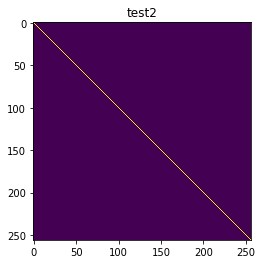

In [6]:
import numpy as np
m = np.eye(256, 256, dtype=np.uint8)
plt.imshow(m)
plt.title('test2')

In [7]:
import logging
logging.getLogger('mine').warning('testing one two 3 4')
task.get_logger().flush()

testing one two 3 4


True

In [8]:

task_params['batch_size'] = 128
task_params['nb_classes'] = 10
task_params['nb_epoch'] = 6
task_params['hidden_dim'] = 512
batch_size = task_params['batch_size']
nb_classes = task_params['nb_classes']
nb_epoch = task_params['nb_epoch']


# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

hidden_dim = task_params['hidden_dim']
model = Sequential()
model.add(Dense(hidden_dim, input_shape=(784,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(hidden_dim))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

board = TensorBoard(histogram_freq=1, log_dir='/tmp/histogram_example')
model_store = ModelCheckpoint(filepath='./weight.{epoch}.hdf5')


history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[board, model_store],
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________________________

60000/60000 [==============================] - ETA: 4s - loss: 0.0744 - acc: 0.976 - ETA: 3s - loss: 0.0408 - acc: 0.983 - ETA: 3s - loss: 0.0347 - acc: 0.986 - ETA: 2s - loss: 0.0310 - acc: 0.988 - ETA: 2s - loss: 0.0326 - acc: 0.988 - ETA: 2s - loss: 0.0308 - acc: 0.989 - ETA: 2s - loss: 0.0321 - acc: 0.989 - ETA: 2s - loss: 0.0319 - acc: 0.988 - ETA: 2s - loss: 0.0334 - acc: 0.988 - ETA: 2s - loss: 0.0335 - acc: 0.988 - ETA: 2s - loss: 0.0334 - acc: 0.988 - ETA: 2s - loss: 0.0357 - acc: 0.987 - ETA: 2s - loss: 0.0345 - acc: 0.988 - ETA: 2s - loss: 0.0349 - acc: 0.988 - ETA: 2s - loss: 0.0346 - acc: 0.988 - ETA: 2s - loss: 0.0351 - acc: 0.988 - ETA: 2s - loss: 0.0362 - acc: 0.987 - ETA: 2s - loss: 0.0351 - acc: 0.988 - ETA: 2s - loss: 0.0340 - acc: 0.988 - ETA: 1s - loss: 0.0339 - acc: 0.988 - ETA: 1s - loss: 0.0350 - acc: 0.988 - ETA: 1s - loss: 0.0352 - acc: 0.988 - ETA: 1s - loss: 0.0356 - acc: 0.988 - ETA: 1s - loss: 0.0351 - acc: 0.988 - ETA: 1s - loss: 0.0357 - acc: 0.988 - ETA

In [9]:
m = cv2.imread('D:\\data\\google_img_scrape\\3d_street_art\\img_17.jpg')
task.get_logger().report_image_and_upload("debug", "3d-street-art", iteration=1, matrix=m)

In [10]:
task.get_logger().flush()
task.close()
print('We are done :)')

We are done :)


In [11]:
logger.flush()

True

In [12]:
import keras
import tensorflow
print('Keras', keras.__version__)
print('TensorFlow', tensorflow.__version__)

Keras 2.2.4
TensorFlow 1.10.0
